In [23]:
!pip install imblearn

In [24]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import plotly.express as px    
!pip install nltk
import nltk
nltk.download([
   "names",
   "stopwords",
   "state_union",
   "wordnet"
   "twitter_samples",
   "movie_reviews",
   "averaged_perceptron_tagger",
   "vader_lexicon",
   "punkt",
])
import nltk
nltk.download('stopwords')
!pip install wordcloud
 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Package 'wordnettwitter_samples' not found in index
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Faderemi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
from sklearn.impute import SimpleImputer 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [26]:
import random
import re
import sys
import os


In [108]:
#read in data set
Climate = pd.read_csv('/Users/Faderemi/Desktop/Climate_change.csv')

In [109]:
Climate.head()

,Timestamp,Embedded_text,Likes,Retweets
0,2022-01-17T23:32:38.000Z,The only solution I’ve ever heard the Left pro...,"2,259",11.7K
1,2022-01-17T22:54:02.000Z,Climate change doesn’t cause volcanic eruption...,64,762
2,2022-01-17T23:51:41.000Z,Vaccinated tennis ball boy collapses in the te...,118,159
3,2022-01-17T21:42:04.000Z,North America has experienced an average winte...,50,158
4,2022-01-17T21:10:40.000Z,They're gonna do the same with Climate Change ...,24,127


In [110]:
Climate.tail()

,Timestamp,Embedded_text,Likes,Retweets
9045,2022-07-18T12:08:28.000Z,#ClimateChange is now the greatest story on Ea...,16,24
9046,2022-07-18T00:33:20.000Z,Replying to \n@jh336405\n @acuna_r\n and 41 ot...,NaN,NaN
9047,2022-07-18T21:13:13.000Z,While Texans are being asked to use less elect...,14,23
9048,2022-07-18T10:15:09.000Z,"Sea levels are rising, and communities are scr...",3,NaN
9049,2022-07-18T16:32:53.000Z,UTS creates algae-analysing robot to combat cl...,NaN,NaN


In [111]:
Climate.describe()

,Timestamp,Embedded_text,Likes,Retweets
count,9050,9050,8431,8877
unique,9000,9046,504,922
top,2022-05-06T23:20:05.000Z,Radiative forcing of #climatechange from the C...,2,9
freq,3,2,789,302


In [112]:
Climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9050 entries, 0 to 9049
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Timestamp      9050 non-null   object
 1   Embedded_text  9050 non-null   object
 2   Likes          8431 non-null   object
 3   Retweets       8877 non-null   object
dtypes: object(4)
memory usage: 282.9+ KB


In [113]:
#check if there are missing values
Climate.isna().any()

print("Missing values distribution: ")
print(Climate.isnull().mean())
print("")


Missing values distribution: 
Timestamp        0.000000
Embedded_text    0.000000
Likes            0.068398
Retweets         0.019116
dtype: float64



In [114]:
# remove rows with any missing values
Climate = Climate.dropna()

print(Climate)

                     Timestamp  \
0     2022-01-17T23:32:38.000Z   
1     2022-01-17T22:54:02.000Z   
2     2022-01-17T23:51:41.000Z   
3     2022-01-17T21:42:04.000Z   
4     2022-01-17T21:10:40.000Z   
...                        ...   
9041  2022-07-18T16:21:05.000Z   
9042  2022-07-18T14:52:28.000Z   
9043  2022-07-18T13:16:48.000Z   
9045  2022-07-18T12:08:28.000Z   
9047  2022-07-18T21:13:13.000Z   

                                          Embedded_text  Likes Retweets  
0     The only solution I’ve ever heard the Left pro...  2,259    11.7K  
1     Climate change doesn’t cause volcanic eruption...     64      762  
2     Vaccinated tennis ball boy collapses in the te...    118      159  
3     North America has experienced an average winte...     50      158  
4     They're gonna do the same with Climate Change ...     24      127  
...                                                 ...    ...      ...  
9041  Prince Harry says climate change has left him ...    704      535  

In [115]:
Climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8394 entries, 0 to 9047
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Timestamp      8394 non-null   object
 1   Embedded_text  8394 non-null   object
 2   Likes          8394 non-null   object
 3   Retweets       8394 non-null   object
dtypes: object(4)
memory usage: 327.9+ KB


In [116]:
Climate.isna().any()

Timestamp        False
Embedded_text    False
Likes            False
Retweets         False
dtype: bool

In [118]:
# Count the number of mentions in a tweet and place in column named mentions
Climate['mentions'] = Climate['Embedded_text'].apply(lambda x: x.count('@'))

# Count the number of hashtags in a tweet and put it in column named hashtags
Climate['hashtags'] = Climate['Embedded_text'].apply(lambda x: x.count('#'))

# Count URLs - new column with true or false
def contains_url(text):
    url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return bool(url_pattern.search(text))

Climate['link'] = Climate['Embedded_text'].apply(contains_url)

Climate['link'] = Climate['link'].astype(int)


In [119]:
Climate.head(15)

,Timestamp,Embedded_text,Likes,Retweets,mentions,hashtags,link
0,2022-01-17T23:32:38.000Z,The only solution I’ve ever heard the Left pro...,"2,259",11.7K,0,0,0
1,2022-01-17T22:54:02.000Z,Climate change doesn’t cause volcanic eruption...,64,762,0,0,0
2,2022-01-17T23:51:41.000Z,Vaccinated tennis ball boy collapses in the te...,118,159,0,0,0
3,2022-01-17T21:42:04.000Z,North America has experienced an average winte...,50,158,0,0,0
4,2022-01-17T21:10:40.000Z,They're gonna do the same with Climate Change ...,24,127,1,0,0
5,2022-01-17T21:41:46.000Z,"HELLO AMERICA,\n\nWho would have ever thought ...",12,22,0,0,0
6,2022-01-17T23:23:28.000Z,fucking hell this weather makes me really fuck...,2,40,0,0,0
7,2022-01-17T22:19:19.000Z,Great to finally have this important UNESCO/SC...,22,49,0,0,1
8,2022-01-17T23:08:50.000Z,Climate change is one of the world's most pres...,27,44,0,3,0
9,2022-01-17T22:44:14.000Z,"Can people start questioning the ""Johnson got ...",6,28,0,1,0


In [36]:
from urllib.parse import urlparse

In [37]:
#check for url in tweets
def count_urls(row):
  text= row['Embedded_text']
  parsed = urlparse(text)
  if parsed.scheme and parsed.netloc:
    return 1
  else:
    return 0

In [38]:
#create rows with url
Climate["num_urls"] = Climate.apply(count_urls, axis= 1)

In [39]:
#check for images in tweets
def contains_image(row):
  text = row['Embedded_text']
  if 'pic.twitter.com' in text:
    return True
  else:
    return False

In [40]:
#create rows with images
Climate["contains_image"] = Climate.apply(count_urls, axis= 1)

In [41]:
Climate.columns

Index(['Timestamp', 'Embedded_text', 'Likes', 'Retweets', 'num_urls',
       'contains_image'],
      dtype='object')

In [42]:
Climate["num_urls"].value_counts()

0    8388
1       6
Name: num_urls, dtype: int64

In [43]:
Climate["contains_image"].value_counts()

0    8388
1       6
Name: contains_image, dtype: int64

In [44]:
def remove_pattern(input_txt,pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i,'', input_txt)
  return input_txt

In [45]:
#remove twitter handles
Climate['Embedded_text'] = np.vectorize(remove_pattern)(Climate['Embedded_text'],"@[\w]*")

In [46]:
#remove symbols from urls to enable running of sentimental analysis
def cleaning_URLs(data):
  return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

In [47]:
print('Count of rows in the data is:  ', len(Climate))

Count of rows in the data is:   8394


In [74]:
#Remove punctuations from tweets
Climate['Embedded_text'] = Climate['Embedded_text'].str.replace("[^a-zA-Z#]", " ")

/var/folders/32/6qvcq16d01vfcf7z_dx2t5300000gn/T/ipykernel_892/2076479610.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Climate['Embedded_text'] = Climate['Embedded_text'].str.replace("[^a-zA-Z#]", " ")


In [75]:
Climate['Timestamp'] = pd.to_datetime(Climate['Timestamp'], infer_datetime_format=True)
Climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8394 entries, 0 to 9047
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Timestamp       8394 non-null   datetime64[ns, UTC]
 1   Embedded_text   8394 non-null   object             
 2   Likes           8394 non-null   object             
 3   Retweets        8394 non-null   object             
 4   num_urls        8394 non-null   int64              
 5   contains_image  8394 non-null   int64              
 6   POS_tags        8394 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 524.6+ KB


In [76]:
import nltk  
from nltk.corpus import stopwords
stop = stopwords.words("english")

#extend stopwords list
my_stopwords = ['https', 'I', 'That','This','There','amp', 'It']
for i in my_stopwords:
    stop.append(i)
print(stop)
#apply
Climate["Embedded_text"] = Climate["Embedded_text"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [77]:
# Define a function to remove short words from a text
def remove_short_words(text):
    words = text.split()
    filtered_words = [word for word in words if len(word) > 4]
    filtered_text = " ".join(filtered_words)
    return filtered_text

In [78]:
Climate['Embedded_text'] = Climate['Embedded_text'].apply(remove_short_words)

In [79]:
print(Climate)

                     Timestamp  \
0    2022-01-17 23:32:38+00:00   
1    2022-01-17 22:54:02+00:00   
2    2022-01-17 23:51:41+00:00   
3    2022-01-17 21:42:04+00:00   
4    2022-01-17 21:10:40+00:00   
...                        ...   
9041 2022-07-18 16:21:05+00:00   
9042 2022-07-18 14:52:28+00:00   
9043 2022-07-18 13:16:48+00:00   
9045 2022-07-18 12:08:28+00:00   
9047 2022-07-18 21:13:13+00:00   

                                          Embedded_text  Likes Retweets  \
0     solution propose climate control freedom playbook  2,259    11.7K   
1                            Climate volcanic eruptions     64      762   
2                          Vaccinated collapses climate    118      159   
3     America experienced average temperatures snowf...     50      158   
4                                       Climate fucking     24      127   
...                                                 ...    ...      ...   
9041  climate feeling battered helpless dailymail cl...    704    

In [80]:
wordcloud = WordCloud(width=600,
                      height=400,
                      random_state=2,
                      max_font_size=100).generate(' '.join(Climate['Embedded_text']))

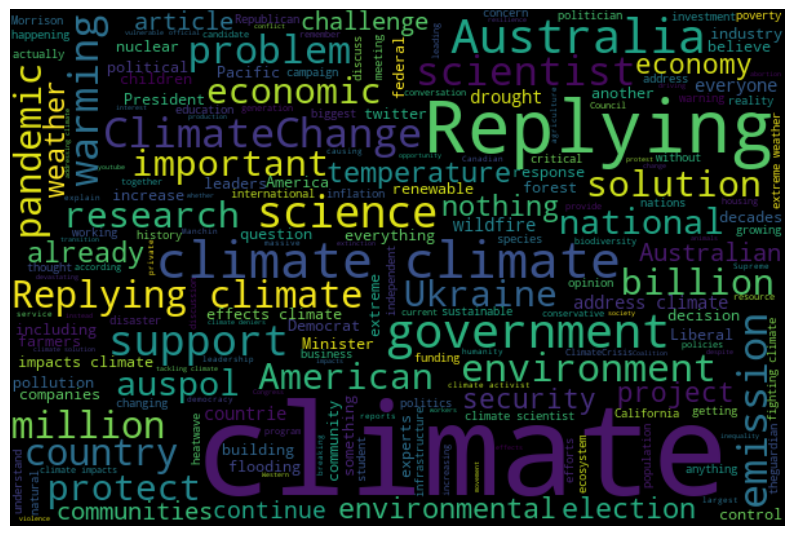

In [81]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [82]:
def preprocess_tweet(tweet):
    # remove URLs, mentions, and hashtags
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'#\w+', '', tweet)
    # remove special characters and punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # convert to lowercase
    tweet = tweet.lower()
    return tweet

In [83]:
#Apply part of speech tagging:
import nltk
from nltk.tag import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
#tokenize tweets
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Faderemi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [84]:
def tokenize_tweet(tweet):
    tokens = word_tokenize(tweet)
    return tokens

In [59]:
import nltk
nltk.download('punkt')
#tokenize the tweet into words
Climate['Embedded_text'] = Climate['Embedded_text'].apply(lambda x: word_tokenize(x))
Climate.head()

[nltk_data] Downloading package punkt to /Users/Faderemi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Timestamp,Embedded_text,Likes,Retweets,num_urls,contains_image
0,2022-01-17 23:32:38+00:00,"[solution, propose, climate, control, freedom,...","2,259",11.7K,0,0
1,2022-01-17 22:54:02+00:00,"[Climate, volcanic, eruptions]",64,762,0,0
2,2022-01-17 23:51:41+00:00,"[Vaccinated, collapses, climate]",118,159,0,0
3,2022-01-17 21:42:04+00:00,"[America, experienced, average, temperatures, ...",50,158,0,0
4,2022-01-17 21:10:40+00:00,"[Climate, fucking]",24,127,0,0


In [86]:
Climate['Embedded_text'] = Climate['Embedded_text'].astype(str)

In [88]:
from nltk import pos_tag, word_tokenize

Climate['tokens'] = Climate['Embedded_text'].apply(word_tokenize)
Climate['POS_tags'] = Climate['tokens'].apply(pos_tag)


In [61]:
Climate['Embedded_text'] = Climate['Embedded_text'].astype(str)

In [89]:
from nltk.probability import FreqDist
fdist = FreqDist(Climate["Embedded_text"])
print(fdist)

<FreqDist with 8244 samples and 8394 outcomes>


In [90]:
fdist.most_common(5)

[('climate', 36),
 ('Replying climate', 20),
 ('Climate', 19),
 ('Replying Climate', 11),
 ('Civilization working fighting desertification EndTigraySiege AllowAcessToAgriculturalInputs',
  5)]

In [91]:
#DATA VISUALISATION
Climatex = Climate[Climate['Timestamp'].dt.year.isin([2022])]
# Convert the date column to a pandas DatetimeIndex and extract the year and hour c
year = pd.DatetimeIndex(Climatex['Timestamp']).year
hour = pd.DatetimeIndex(Climatex['Timestamp']).hour
month = pd.DatetimeIndex(Climatex['Timestamp']).month
# Categorize the hours into morning, afternoon, or evening bins
bins = [0, 11, 16, 23]
labels = ['morning', 'afternoon', 'evening']
time_of_day = pd.cut(hour, bins=bins, labels=labels)
# Group the tweets into month and time of day, and count the number of tweets in each
grouped = Climatex.groupby([month, time_of_day])['Embedded_text'].count().unstack()


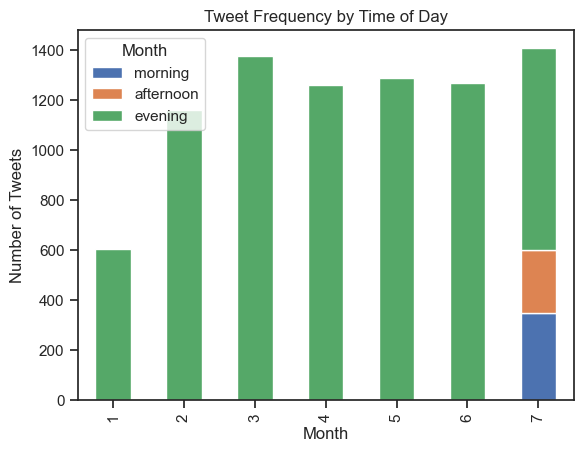

In [92]:
# Create a stacked bar chart to visualize the tweet frequency by time of day and ye
ax = grouped.plot(kind='bar', stacked=True, title='Tweet Frequency by Time of Day')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Tweets')
ax.legend(title='Month')
plt.show()

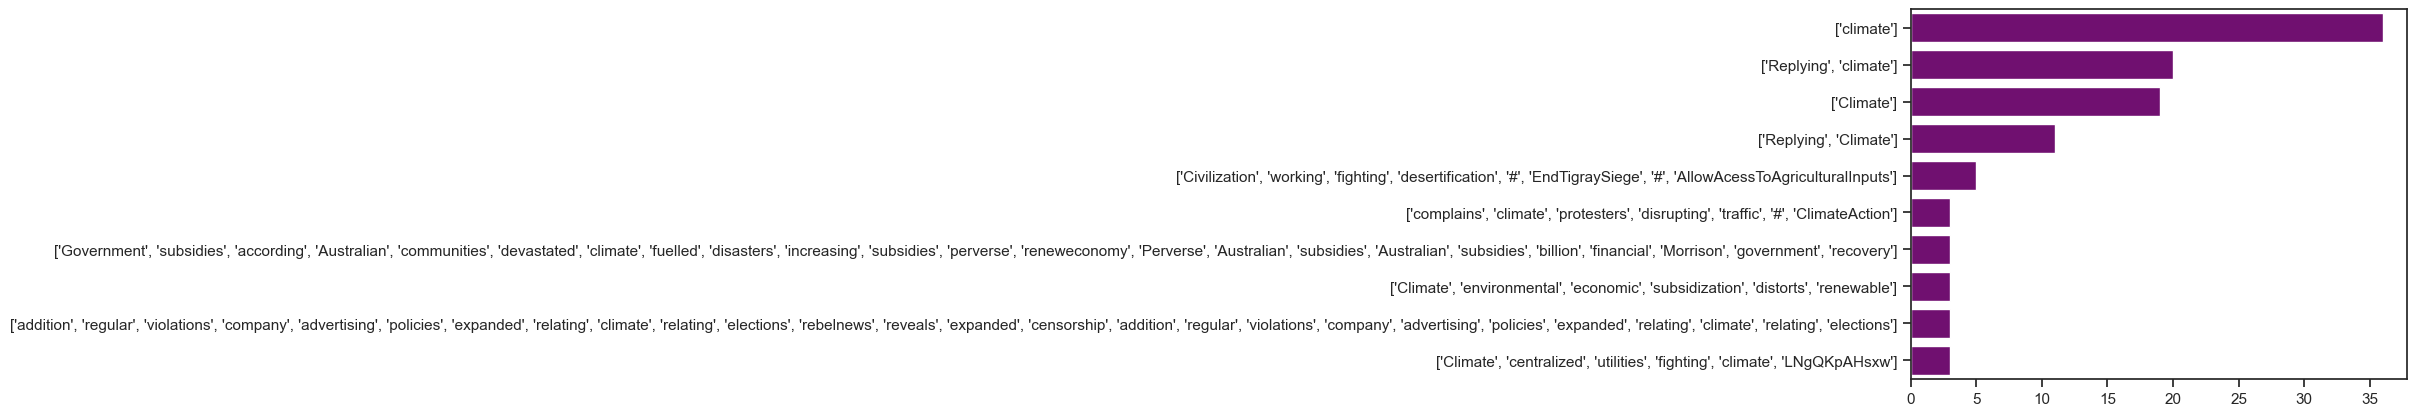

In [66]:
#plot the most common words
# Obtain top 10 words
top_10 = fdist.most_common(10)
# add pandas series to plot
fdist = pd.Series(dict(top_10))
#plot common words
sns.set_theme(style="ticks")
sns.barplot(y=fdist.index, x=fdist.values, color='purple');

NameError: name 'sentiment' is not defined

In [93]:
Climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8394 entries, 0 to 9047
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Timestamp       8394 non-null   datetime64[ns, UTC]
 1   Embedded_text   8394 non-null   object             
 2   Likes           8394 non-null   object             
 3   Retweets        8394 non-null   object             
 4   num_urls        8394 non-null   int64              
 5   contains_image  8394 non-null   int64              
 6   POS_tags        8394 non-null   object             
 7   tokens          8394 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 590.2+ KB


In [95]:
#Performing Sentiment Analysis
!pip install textblob
from textblob import TextBlob

def get_tweet_sentiment(tweet):
    # create a TextBlob object for the tweet
    blob = TextBlob(tweet)
    # calculate the sentiment polarity of the tweet (-1 to 1)
    sentiment_polarity = blob.sentiment.polarity
    #group sentiment into positive, negative, or neutral based on the polarity score
    if sentiment_polarity > 0:
        sentiment = 'positive'
    elif sentiment_polarity < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    return sentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 1.9 MB/s eta 0:00:0000:0100:01


In [96]:
#Aggregate the Sentiment Scores and Calculating Summary Statistics:

def calculate_sentiment_stats(sentiments):
    # count the number of positive, negative, and neutral tweets
    positive_count = sentiments.count('positive')
    negative_count = sentiments.count('negative')
    neutral_count = sentiments.count('neutral')
    # calculate the mean, median, and standard deviation of the sentiment scores
    sentiment_scores = [1 if sentiment == 'positive' else -1 if sentiment == 'negative' else 0 for sentiment in sentiments]
    sentiment_mean = sum(sentiment_scores) / len(sentiment_scores)
    sentiment_median = sorted(sentiment_scores)[len(sentiment_scores) // 2]
    sentiment_stddev = (sum([(score - sentiment_mean) * 2 for score in sentiment_scores]) / len(sentiment_scores)) * 0.5
    return positive_count, negative_count, neutral_count, sentiment_mean, sentiment_median, sentiment_stddev

In [97]:
#Evaluate accuracy of Sentiment Analysis Algorithm:

def evaluate_sentiment_accuracy(sentiments, labels):
    # compare the predicted sentiments to the true labels and calculate the accuracy
    correct_count = 0
    total_count = len(sentiments)
    for i in range(total_count):
        if sentiments[i] == labels[i]:
            correct_count += 1
    accuracy = correct_count / total_count
    return accuracy

In [99]:
Climate['tweet_length'] = Climate['Embedded_text'].apply(len)

In [100]:
# Perform sentiment analysis on the text of each tweet
Climate['polarity'] = Climate['Embedded_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
Climate['sentiment'] = Climate['polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [102]:
# Create a DataFrame with the counts of positive, negative, and neutral tweets
sentiment_counts = Climate.groupby(['sentiment'])['Embedded_text'].count().reset_index()

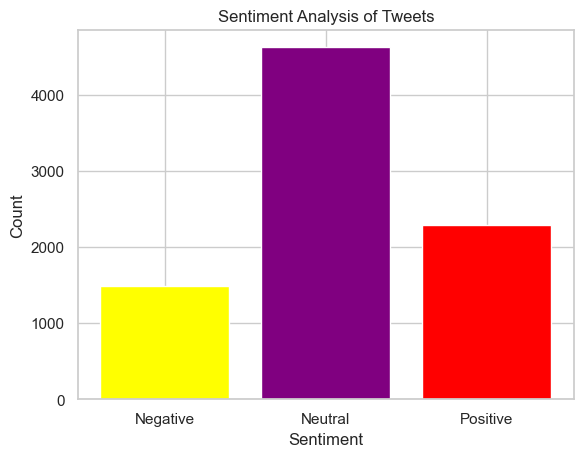

In [105]:
# Create a stacked bar chart of the sentiment analysis results
sns.set_style('whitegrid')
plt.bar(sentiment_counts['sentiment'], sentiment_counts['Embedded_text'], color=['yellow', 'purple', 'red'])
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [106]:
Climate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8394 entries, 0 to 9047
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Timestamp       8394 non-null   datetime64[ns, UTC]
 1   Embedded_text   8394 non-null   object             
 2   Likes           8394 non-null   object             
 3   Retweets        8394 non-null   object             
 4   num_urls        8394 non-null   int64              
 5   contains_image  8394 non-null   int64              
 6   POS_tags        8394 non-null   object             
 7   tokens          8394 non-null   object             
 8   tweet_length    8394 non-null   int64              
 9   polarity        8394 non-null   float64            
 10  sentiment       8394 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 786.9+ KB
